<a href="https://colab.research.google.com/github/mitali-datascientist/PythonOperationsandProjects/blob/master/QRCodeScanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab.patches import cv2_imshow

In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


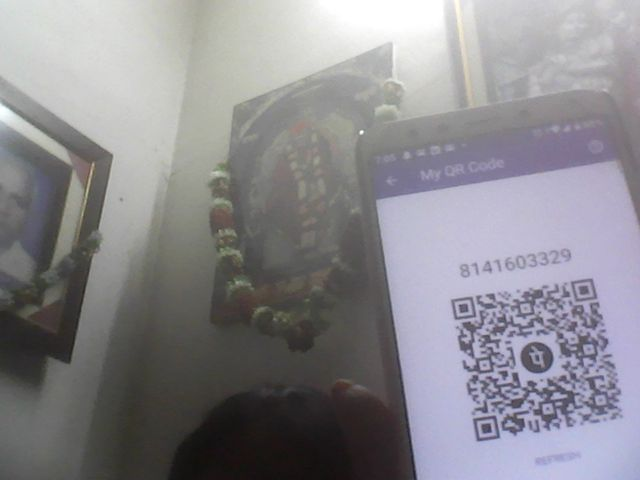

In [16]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [6]:
pip install pyzbar

In [8]:
!apt install libzbar0


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzbar0 amd64 0.10+doc-10.1build2 [75.7 kB]
Fetched 193 kB in 1s (183 kB/s)
Selecting previously unselected package libv4lconvert0:amd64.
(Reading database ... 144619 files and directories currently installed.)
Preparing to unpack .../libv4lconvert0_1.14.2-1_amd64.deb ...
Unpacking libv4lconvert0:amd64 (1.14.2-1) ...
Selecting p

In [9]:
import cv2
import numpy as np
from pyzbar.pyzbar import decode

In [32]:
img = cv2.imread('/content/qr2.png')

foo' or 1=1--  See, this didn't do anything to you, end the skript kiddie barcodes!


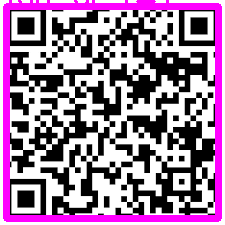

In [33]:
for barcode in decode(img):
  myData = barcode.data.decode('utf-8')
  print(myData)
  pts = np.array([barcode.polygon],np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.polylines(img,[pts],True,(255,0,255),5)
  pts2 = barcode.rect
  cv2.putText(img,myData,(pts2[0],pts2[1]),cv2.FONT_HERSHEY_SIMPLEX,
  0.9,(255,0,255),2)
 
cv2_imshow(img)

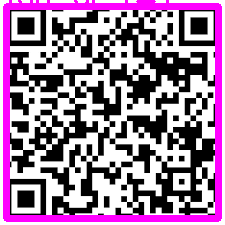

In [39]:
for barcode in decode(img):
        myData = barcode.data.decode('utf-8')
        print(myData)
 
        if myData in myDataList:
            myOutput = 'Authorized'
            
            myColor = (0,255,0)
        else:
            myOutput = 'Un-Authorized'
            print(myOutput)
            myColor = (0, 0, 255)
 
        pts = np.array([barcode.polygon],np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(img,[pts],True,myColor,5)
        pts2 = barcode.rect
        cv2.putText(img,myOutput,(pts2[0],pts2[1]),cv2.FONT_HERSHEY_SIMPLEX,
                    0.9,myColor,1)
cv2_imshow(img)